In [1]:
%load_ext autoreload
%autoreload 2

# Automatic Construction of a HEOM MPO of a Molecule in a Cavity

## The Hamiltonian

Here we generate the effective Hamiltonian $\mathcal{H}$ that describes the hierarchical equations of motion.
We consider the special case of multiple molecules inside a cavity.

In [2]:
from mol_ham import generate_hamiltonian

In [3]:
num_mol = 3
num_mol_bath = 2
num_cav_bath = 1

In [4]:
heom_ham = generate_hamiltonian(num_mol, num_mol_bath, num_cav_bath)
for term in heom_ham.terms:
    print(term)

(1, '1', {'cavity': 'Hc'})
(-1, '1', {'cavity_twin': 'Hc'})
(1, 'facmc0', {'cavity': 'Cc', 'mol0': 'Cm'})
(-1, 'facmc0', {'cavity_twin': 'Cc', 'mol0_twin': 'Cm'})
(1, 'facmc1', {'cavity': 'Cc', 'mol1': 'Cm'})
(-1, 'facmc1', {'cavity_twin': 'Cc', 'mol1_twin': 'Cm'})
(1, 'facmc2', {'cavity': 'Cc', 'mol2': 'Cm'})
(-1, 'facmc2', {'cavity_twin': 'Cc', 'mol2_twin': 'Cm'})
(1, '1', {'mol0': 'Hm'})
(-1, '1', {'mol0_twin': '-Hm'})
(1, '1', {'mol1': 'Hm'})
(-1, '1', {'mol1_twin': '-Hm'})
(1, '1', {'mol2': 'Hm'})
(-1, '1', {'mol2_twin': '-Hm'})
(1, 'Delta01', {'mol0': 'Cm', 'mol1': 'Cm'})
(-1, 'Delta01', {'mol0_twin': 'Cm', 'mol1_twin': 'Cm'})
(1, 'Delta02', {'mol0': 'Cm', 'mol2': 'Cm'})
(-1, 'Delta02', {'mol0_twin': 'Cm', 'mol2_twin': 'Cm'})
(1, 'Delta12', {'mol1': 'Cm', 'mol2': 'Cm'})
(-1, 'Delta12', {'mol1_twin': 'Cm', 'mol2_twin': 'Cm'})
(-1, 'im*gammac', {'cav_bath0': 'N'})
(-1, 'i*gamma0_0', {'mol_bath0_0': 'N'})
(-1, 'i*gamma0_1', {'mol_bath0_1': 'N'})
(-1, 'i*gamma1_0', {'mol_bath1_0': 'N

Note that we do not specify the coefficient or operator values, as these specifics are outside the scope of this work and not neccessary to find the TTNO bond dimensions.

We can also consider the case where the molecules are treated the same.

In [5]:
homog_heom_ham = generate_hamiltonian(num_mol, num_mol_bath, num_cav_bath,
                                      homogenous_mc=True,
                                      homogenous_mm=True)
for term in heom_ham.terms:
    print(term)

(1, '1', {'cavity': 'Hc'})
(-1, '1', {'cavity_twin': 'Hc'})
(1, 'facmc0', {'cavity': 'Cc', 'mol0': 'Cm'})
(-1, 'facmc0', {'cavity_twin': 'Cc', 'mol0_twin': 'Cm'})
(1, 'facmc1', {'cavity': 'Cc', 'mol1': 'Cm'})
(-1, 'facmc1', {'cavity_twin': 'Cc', 'mol1_twin': 'Cm'})
(1, 'facmc2', {'cavity': 'Cc', 'mol2': 'Cm'})
(-1, 'facmc2', {'cavity_twin': 'Cc', 'mol2_twin': 'Cm'})
(1, '1', {'mol0': 'Hm'})
(-1, '1', {'mol0_twin': '-Hm'})
(1, '1', {'mol1': 'Hm'})
(-1, '1', {'mol1_twin': '-Hm'})
(1, '1', {'mol2': 'Hm'})
(-1, '1', {'mol2_twin': '-Hm'})
(1, 'Delta01', {'mol0': 'Cm', 'mol1': 'Cm'})
(-1, 'Delta01', {'mol0_twin': 'Cm', 'mol1_twin': 'Cm'})
(1, 'Delta02', {'mol0': 'Cm', 'mol2': 'Cm'})
(-1, 'Delta02', {'mol0_twin': 'Cm', 'mol2_twin': 'Cm'})
(1, 'Delta12', {'mol1': 'Cm', 'mol2': 'Cm'})
(-1, 'Delta12', {'mol1_twin': 'Cm', 'mol2_twin': 'Cm'})
(-1, 'im*gammac', {'cav_bath0': 'N'})
(-1, 'i*gamma0_0', {'mol_bath0_0': 'N'})
(-1, 'i*gamma0_1', {'mol_bath0_1': 'N'})
(-1, 'i*gamma1_0', {'mol_bath1_0': 'N

The Hamiltonian is general and works all tree structures representing the molecules, cavity, and bath.

## Tree Structures

The first tensor network structure, we consider is a matrix product or tensor train structure. Here we attach the molecule and cavity sites directly to their bath sides along a chain and then attach the chains to eeach other.

In [6]:
from mol_mp import generate_mps_structure

In [7]:
mol_dim = 10
cav_dim = 8
mol_bath_dim = 6
cav_bath_dim = 6

In [8]:
mps = generate_mps_structure(mol_dim,
                             cav_dim,
                             mol_bath_dim,
                             cav_bath_dim,
                             num_mol,
                             num_mol_bath,
                             num_cav_bath)
print("Tensor Train")
for node in mps.nodes.values():
    print(f"{node.identifier}: parent is {node.parent}")
    print(f" and the children are {node.children}")

Tensor Train
cavity: parent is None
 and the children are ['cavity_twin', 'mol0_twin']
cavity_twin: parent is cavity
 and the children are ['cav_bath0']
cav_bath0: parent is cavity_twin
 and the children are ['mol1_twin']
mol0_twin: parent is cavity
 and the children are ['mol0']
mol0: parent is mol0_twin
 and the children are ['mol_bath0_0']
mol_bath0_0: parent is mol0
 and the children are ['mol_bath0_1']
mol_bath0_1: parent is mol_bath0_0
 and the children are ['mol2_twin']
mol1_twin: parent is cav_bath0
 and the children are ['mol1']
mol1: parent is mol1_twin
 and the children are ['mol_bath1_0']
mol_bath1_0: parent is mol1
 and the children are ['mol_bath1_1']
mol_bath1_1: parent is mol_bath1_0
 and the children are []
mol2_twin: parent is mol_bath0_1
 and the children are ['mol2']
mol2: parent is mol2_twin
 and the children are ['mol_bath2_0']
mol_bath2_0: parent is mol2
 and the children are ['mol_bath2_1']
mol_bath2_1: parent is mol_bath2_0
 and the children are []


The second tree structure is a binary tree with the cavity nodes at the "root" node. The leafs of this binary tree are the molecular nodes. Once more the baths node are attached to the corresponding molecular and cavity nodes.

In [9]:
from mol_tree import generate_molecule_tree

In [10]:
ttns = generate_molecule_tree(mol_dim,
                              cav_dim,
                              mol_bath_dim,
                              cav_bath_dim,
                              num_mol,
                              num_mol_bath,
                              num_cav_bath)
print("Binary Tree")
for node in mps.nodes.values():
    print(f"{node.identifier}: parent is {node.parent}")
    print(f" and the children are {node.children}")

Binary Tree
cavity: parent is None
 and the children are ['cavity_twin', 'mol0_twin']
cavity_twin: parent is cavity
 and the children are ['cav_bath0']
cav_bath0: parent is cavity_twin
 and the children are ['mol1_twin']
mol0_twin: parent is cavity
 and the children are ['mol0']
mol0: parent is mol0_twin
 and the children are ['mol_bath0_0']
mol_bath0_0: parent is mol0
 and the children are ['mol_bath0_1']
mol_bath0_1: parent is mol_bath0_0
 and the children are ['mol2_twin']
mol1_twin: parent is cav_bath0
 and the children are ['mol1']
mol1: parent is mol1_twin
 and the children are ['mol_bath1_0']
mol_bath1_0: parent is mol1
 and the children are ['mol_bath1_1']
mol_bath1_1: parent is mol_bath1_0
 and the children are []
mol2_twin: parent is mol_bath0_1
 and the children are ['mol2']
mol2: parent is mol2_twin
 and the children are ['mol_bath2_0']
mol_bath2_0: parent is mol2
 and the children are ['mol_bath2_1']
mol_bath2_1: parent is mol_bath2_0
 and the children are []


## Running the Construction
For both kinds of structures there are fuctions that take care of the construction of the TTNO and will save the corresponding bond dimension to a file.
They will run the construction for both construction algorithms (pure bipartite and SGE + bipartite) and for heterogenous and homogenous Hamiltonians. One merely has to enter the maximum and minimum number of molecules and baths to be considered.

In [11]:
from script_mpo import main as mpo_main
from script_tree import main as tree_main

In [12]:
params = {
        "min_mol": 2,
        "max_mol": 15,
        "num_baths_min": 1,
        "num_baths_max": 15
        }

In [ ]:
mpo_main(params)
tree_main(params)

## Plotting the Data

We can easily generate the different kinds of plots used in the paper.

In [18]:
from plot import main as plot_main
from plot_mode_comparison import main as plot_comp_main
from pytreenet.ttno.state_diagram import TTNOFinder

These plots just show the average and maximum bond dimension for a single construction case with respect to te molecule number and bath number.

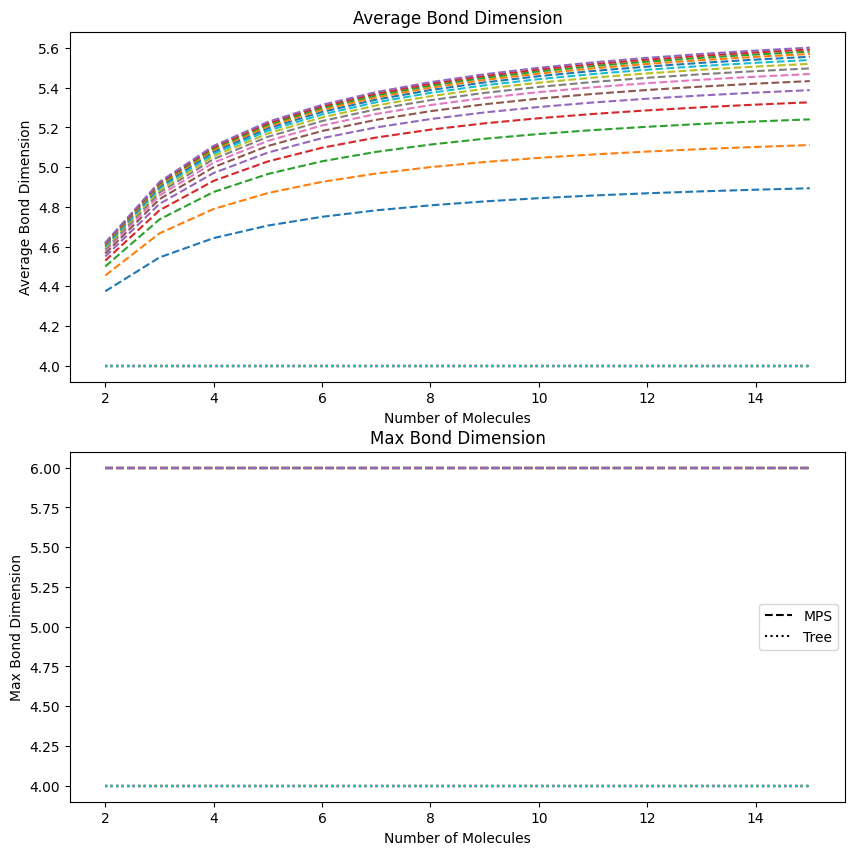

In [19]:
plot_main(homogenous=True,
          mode=TTNOFinder.SGE,
          save=False)

These plots show the given bond dimension information for a given homogeniety and for all modes and structures.

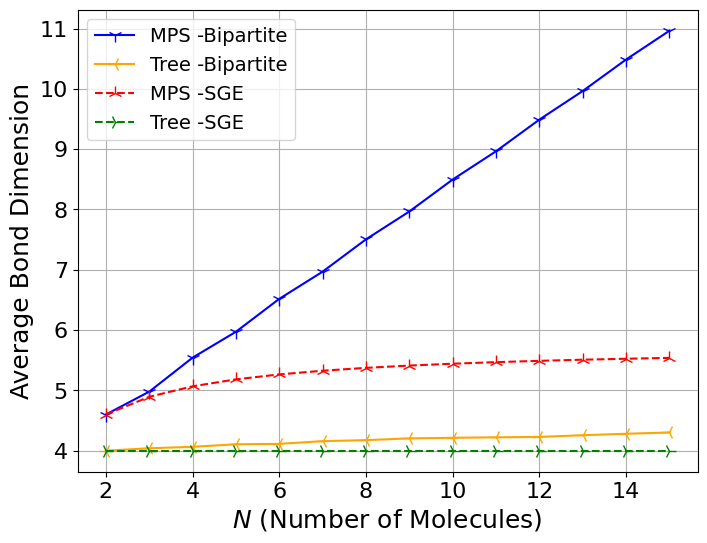

In [20]:
plot_comp_main(homogenous=True,
               datatype="avg_bond_dims",
               save=False)

## Run Everything

We can also easily do all constructions and plots in one go. Since the constructions were already done, we only do all the plots

In [21]:
from full_script import main_simulation

Plotting Results


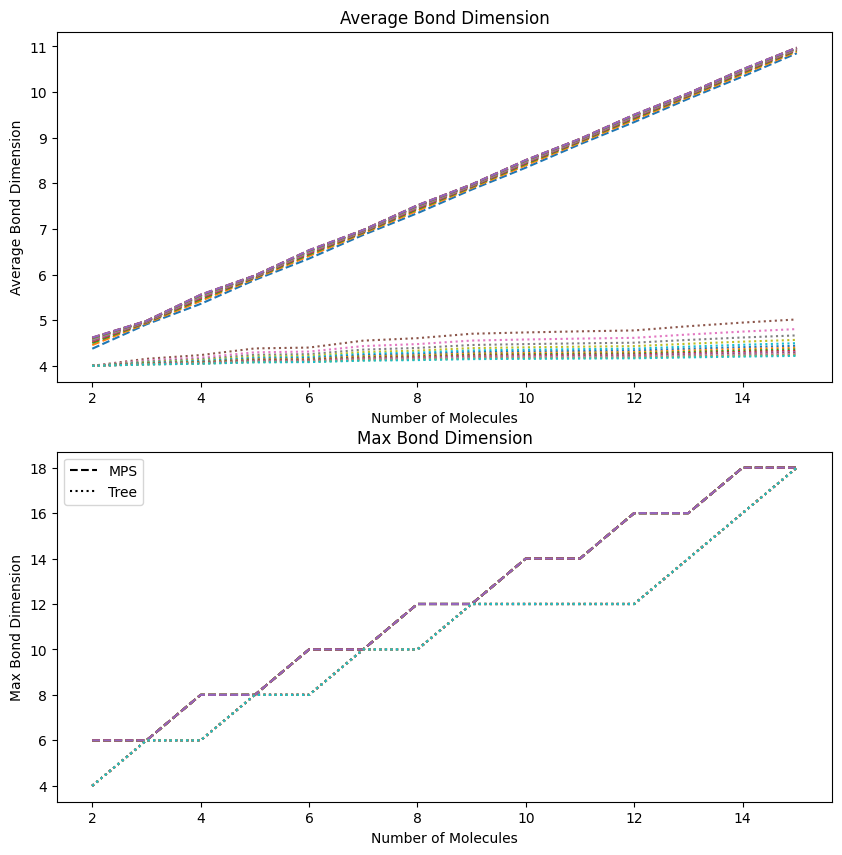

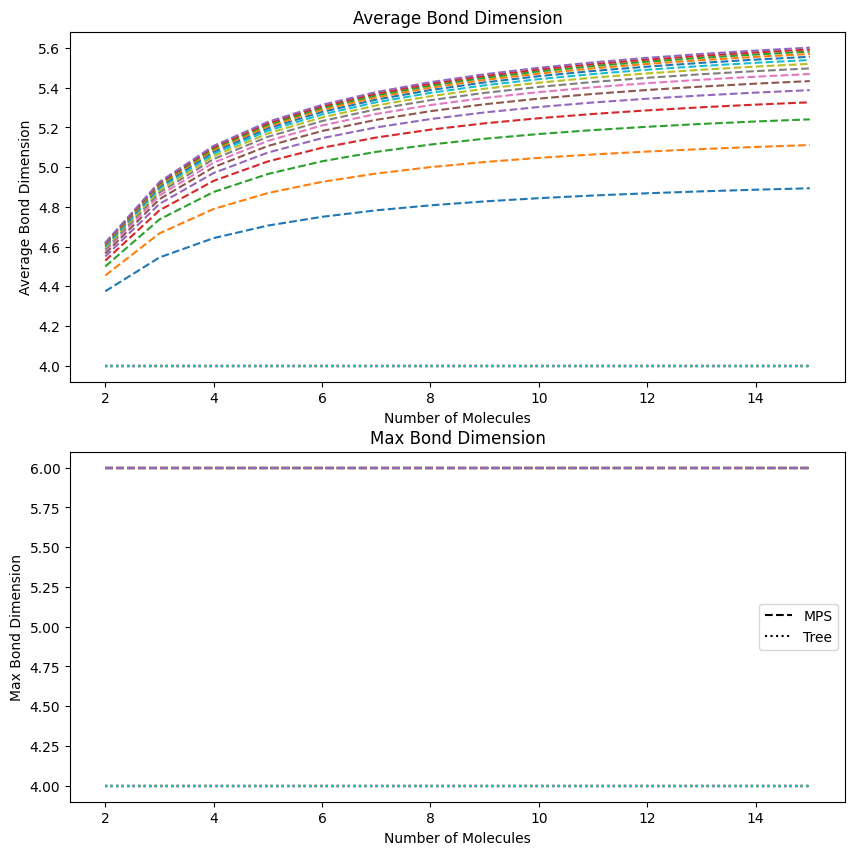

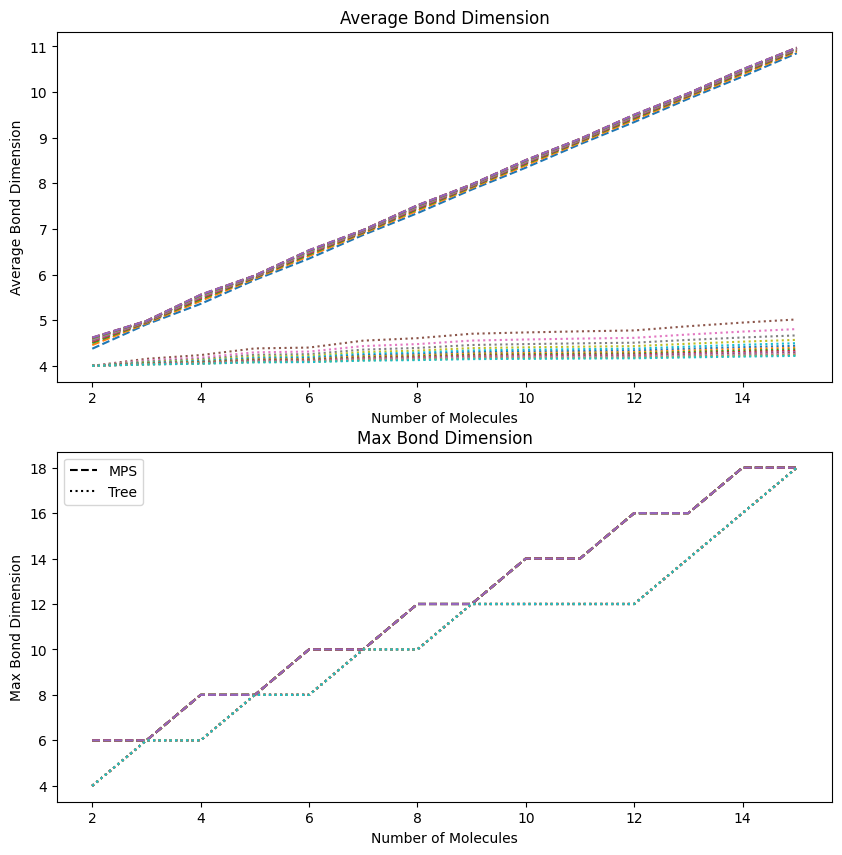

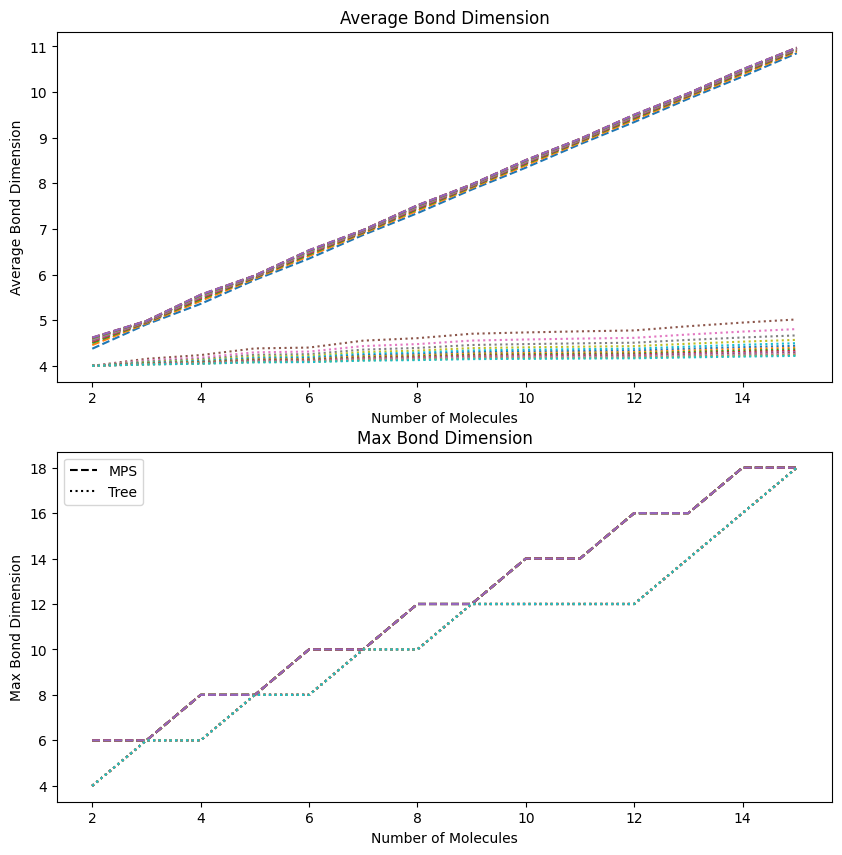

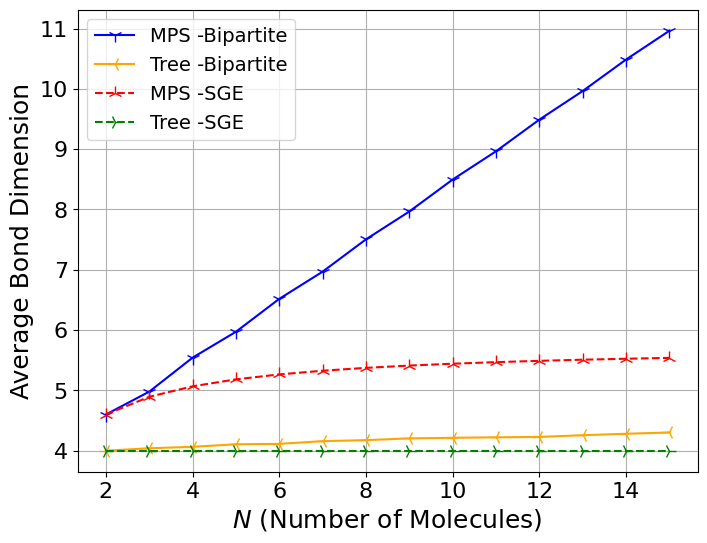

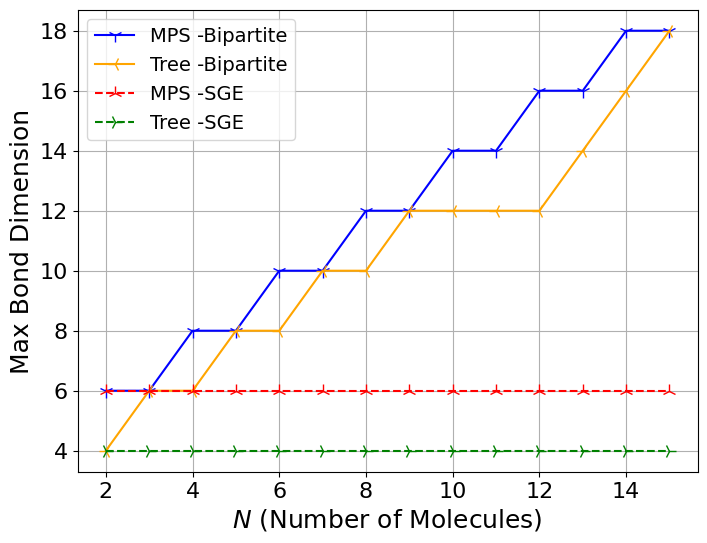

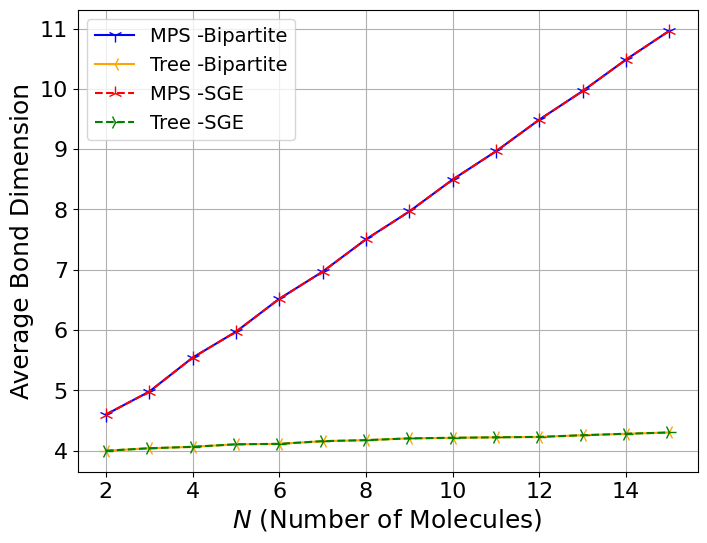

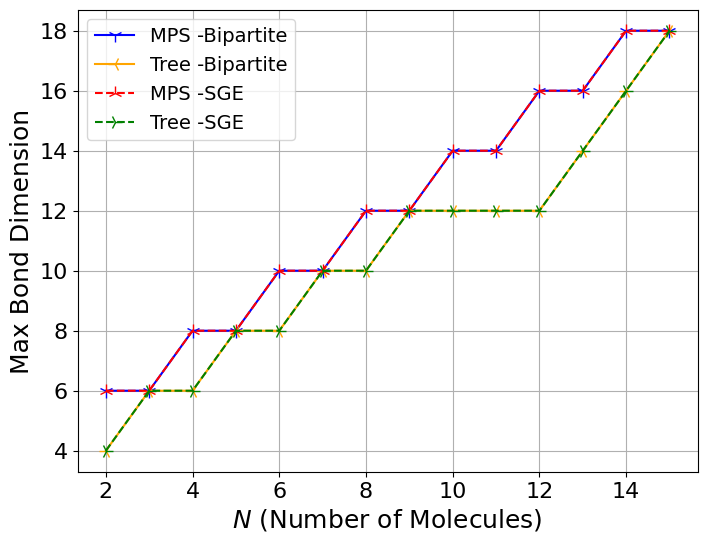

In [22]:
main_simulation(params,
                construction=False,
                plot=True,
                save=False)